# Exericise 1

1) a) Man scha ̈tze durch wiederholte Simulationen die Wahrscheinlichkeit von dem Ereignis
A: in einer Gruppe von k = 23 Personen mindestens zwei Personen haben den gleichen Geburtstag. Annahme: Das Jahr hat n = 365 Tage.
b) Man berechne (in Python) die theoretische Wahrscheinlichkeit P (A) ?

In [11]:
import numpy as np
from numpy import random, unique, square, power, linalg, array

import random
import matplotlib.pyplot as plt
from matplotlib.pyplot import axis, plot, figure, show, legend, Circle, text
from matplotlib.pyplot import axis, plot, figure, show, legend, scatter, xlabel, ylabel, title, colorbar

from math import dist

In [4]:
# a)
num_simulations = 100000

k = 23

n = 365

event_count = 0

for _ in range(num_simulations):
    birthdays = np.random.randint(1, n+1, size=k)
    
    if len(birthdays) != len(set(birthdays)):
        event_count += 1
        
simulated_prob = event_count / num_simulations
print(f"Simulated probability: {simulated_prob:.4f}")


# b)
def theoretical_probability(k , n):
    p = 1.0
    for i in range(1, k):
        p *= (n - i) / n
    return 1 - p

theoretical_prob = theoretical_probability(k, n)
print(f"Theoretical probability: {theoretical_prob:.4f}")

Simulated probability: 0.5082
Theoretical probability: 0.5073


In [5]:
num_points = 1000000
points_inside_circle = 0

for _ in range(num_points):
    x = random.random()
    y = random.random()
    if dist((x, y), (0, 0)) <= 1:
        points_inside_circle += 1
        
probability_inside_circle = points_inside_circle / num_points
print(f"Probability inside circle: {probability_inside_circle:.4f}")

Probability inside circle: 0.7855


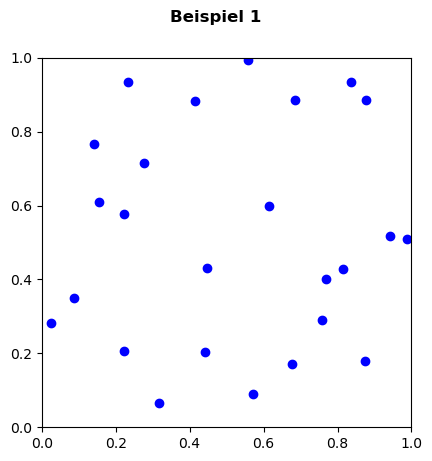

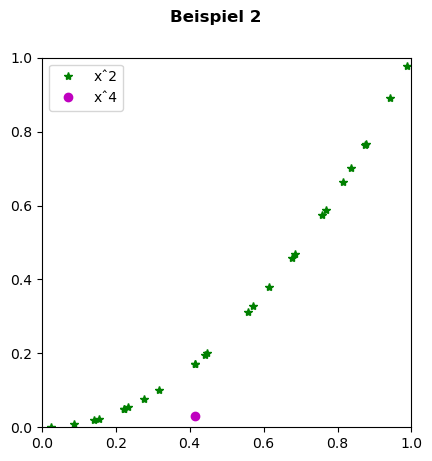

In [9]:


fig = figure()
axis("square")
axis((0, 1, 0, 1))
X=np.random.random(25)
Y=np.random.random(25)
plot(X,Y,"bo")
fig.suptitle("Beispiel 1 ",fontweight ="bold")
show()
fig = figure()
axis("square")
axis((0, 1, 0, 1))
plot(X,np.square(X),"g*") # zufallige Punkte auf dem Bild der Funktion F(x)=xˆ2 plot(X,numpy.power(X,4),"mo") # zufallige Punkte auf dem Bild der Funktion F(x)=xˆ4
plot(X[-1],np.square(X[-1]),"g*",label="xˆ2")
plot(X[-1],np.power(X[-1],4),"mo",label="xˆ4")
legend(loc='upper left')
fig.suptitle("Beispiel 2 ",fontweight ="bold")
show()

2) Man mochte die Wahrscheinlichkeit scha ̈tzen, dass ein zufallig gewahlter Punkt im Quadrat [0,1] × [0,1] sich auch in dem eingeschriebenen Kreis befindet (siehe Bild).
(2a) Man simuliere N zufa ̈llige Punkte im Quadrat und man za ̈hle wie viele im Kreisinneren sind; sei k diese Zahl. Man zeichne auf demselben Bild die zufa ̈lligen Punkte mit verschiedenen Farben: diejenigen die im bzw. die außhalb des Kreisinneren sind. Hinweis: fu ̈r die euklidische Distanz zwischen zwei Punkten kann man math.dist benutzen.
(2b) Welches ist die Wahrscheinlichkeit, dass der Punkt im Kreisinneren ist? [Der theoretische Wert ist π4 , bzw. die Approximation ist k/n .]
3) (2c) Anhand von (2a) und (2b) gebe man verschiedene Approximationen von π an. [Hinweis: π ≈ 4 · k/n ]

In [10]:
#2.
num_points = 1000000
points_inside_circle = 0

for _ in range(num_points):
    x = random.uniform(0, 1)
    y = random.uniform(0, 1)
    
    if x ** 2 + y ** 2 <= 1:
        points_inside_circle += 1
        
probability_inside_circle = points_inside_circle / num_points
print(f"Probability inside circle: {probability_inside_circle:.4f}")

Probability inside circle: 0.7853


Estimated pi: 3.1400


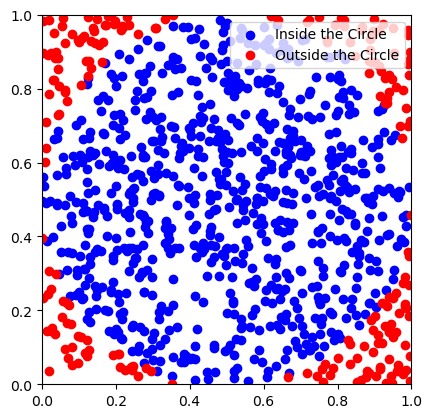

In [12]:
#number of random points to generate
N = 1000

#initialize counters
k = 0

points_inside = []
points_outside = []

for _ in range(N):
    x = random.uniform(0, 1)
    y = random.uniform(0, 1)
    if dist((x, y), (0.5, 0.5)) <= 0.5:
        k += 1
        points_inside.append((x, y))
    else:
        points_outside.append((x, y))
        
estimated_pi = 4 * k / N
print(f"Estimated pi: {estimated_pi:.4f}")

inside_x, inside_y = zip(*points_inside)
outside_x, outside_y = zip(*points_outside)

plt.scatter(inside_x, inside_y, color="blue", label="Inside the Circle")
plt.scatter(outside_x, outside_y, color="red", label="Outside the Circle")
plt.gca().set_aspect("equal", adjustable='box')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend()
plt.show()

In [13]:
import random
import math

# Number of random points to generate
num_points = 1000000
# Initialize a counter for points inside the circle
points_inside_circle = 0

# Perform the Monte Carlo simulation
for _ in range(num_points):
    # Generate random coordinates in the square [0,1] × [0,1]
    x = random.uniform(0, 1)
    y = random.uniform(0, 1)

    # Check if the point is inside the inscribed circle (x^2 + y^2 <= 1)
    if x**2 + y**2 <= 1:
        points_inside_circle += 1

# Calculate the estimated probability
probability_inside_circle = points_inside_circle / num_points

print(f"Estimated Probability: {probability_inside_circle:.4f}")
print(f"Theoretical Probability (π/4): {math.pi / 4:.4f}")


Estimated Probability: 0.7857
Theoretical Probability (π/4): 0.7854


In [14]:
import random
import math

# List of different values of N
Ns = [100, 1000, 10000, 100000, 1000000]

for N in Ns:
    # Initialize a counter for points inside the circle
    points_inside_circle = 0

    # Perform the Monte Carlo simulation
    for _ in range(N):
        # Generate random coordinates in the square [0,1] × [0,1]
        x = random.uniform(0, 1)
        y = random.uniform(0, 1)

        # Check if the point is inside the inscribed circle (x^2 + y^2 <= 1)
        if x**2 + y**2 <= 1:
            points_inside_circle += 1

    # Calculate the approximation of π using π ≈ 4 * Nk
    pi_approximation = 4 * points_inside_circle / N
    print(f"N = {N}, π Approximation: {pi_approximation:.6f}")


N = 100, π Approximation: 3.120000
N = 1000, π Approximation: 3.092000
N = 10000, π Approximation: 3.137200
N = 100000, π Approximation: 3.147080
N = 1000000, π Approximation: 3.141116


In [15]:
import random
import math

# List of different values of N
Ns = [100, 1000, 10000, 100000, 1000000]

# Define a lambda function for the Monte Carlo simulation
monte_carlo_simulation = lambda N: (4 * sum(1 for _ in range(N) if random.uniform(0, 1)**2 + random.uniform(0, 1)**2 <= 1) / N)

# Calculate and print the π approximation for each value of N
approximations = [(N, monte_carlo_simulation(N)) for N in Ns]
for N, pi_approximation in approximations:
    print(f"N = {N}, π Approximation: {pi_approximation:.6f}")



N = 100, π Approximation: 3.200000
N = 1000, π Approximation: 3.128000
N = 10000, π Approximation: 3.150800
N = 100000, π Approximation: 3.148440
N = 1000000, π Approximation: 3.140216


In [19]:
import random
import matplotlib.pyplot as plt

# Number of random points to generate
num_points = 10000

# Initialize counters for different cases
one_obtuse = 0
two_obtuse = 0

# Lists to store coordinates of points for each case
one_obtuse_points = []
two_obtuse_points = []

for _ in range(num_points):
    # Generate a random point A in the square
    x = random.uniform(0, 1)
    y = random.uniform(0, 1)

    # Define the coordinates of the square's vertices
    vertices = [(0, 0), (1, 0), (1, 1), (0, 1)]

    # Connect point A with the vertices and calculate angles
    angles = []
    for vertex in vertices:
        angle = abs((x - vertex[0]) * (1 - vertex[1]) - (1 - x) * (vertex[1] - y))
        angle /= ((x - vertex[0])**2 + (y - vertex[1])**2)**0.5
        angle = abs(180 - (abs(180 - angle) % 180))
        angles.append(angle)

    # Count the number of obtuse angles
    obtuse_count = sum(1 for angle in angles if angle > 90)

    # Update counters and store points for each case
    if obtuse_count == 1:
        one_obtuse += 1
        one_obtuse_points.append((x, y))
    elif obtuse_count == 2:
        two_obtuse += 1
        two_obtuse_points.append((x, y))

# Calculate probabilities
probability_one_obtuse = one_obtuse / num_points
probability_two_obtuse = two_obtuse / num_points

print(f"Probability of exactly one obtuse angle: {probability_one_obtuse:.4f}")
print(f"Probability of exactly two obtuse angles: {probability_two_obtuse:.4f}")

# Plot the points with different colors for each case
one_obtuse_x, one_obtuse_y = zip(*one_obtuse_points)
two_obtuse_x, two_obtuse_y = zip(*two_obtuse_points)

plt.scatter(one_obtuse_x, one_obtuse_y, color='blue', label='Exactly 1 Obtuse Angle')
plt.scatter(two_obtuse_x, two_obtuse_y, color='red', label='Exactly 2 Obtuse Angles')
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend()
plt.show()


Probability of exactly one obtuse angle: 0.0000
Probability of exactly two obtuse angles: 0.0000


ValueError: not enough values to unpack (expected 2, got 0)


4) Man schreibe ein Programm (in Python), in welchem ein Bild mit N = 500 roten zufa ̈lligen Punkten generiert wird −→ wie im unteren Bild. Man scha ̈tze die Wahrscheinlichkeit, dass ein zufa ̈llig gewa ̈hlter Punkt aus dem Quadrat sich im Inneren des unteren oder oberen Dreieckes befindet (wie im Bild).

Estimated Probability: 0.7360


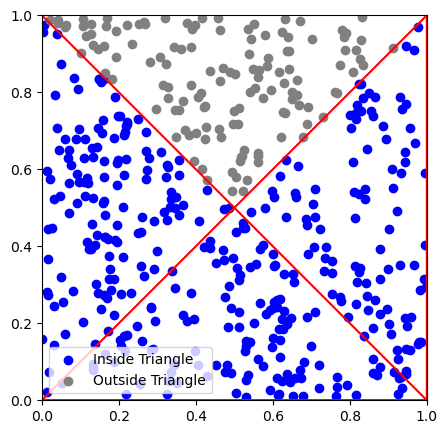

In [31]:
import matplotlib.pyplot as plt
import random

# Number of random points
N = 500

# Initialize counters
inside_triangle = 0

# Lists to store coordinates of points inside and outside the triangles
inside_triangle_points = []
outside_triangle_points = []

# Define the coordinates of the square's vertices
square_vertices = [(0, 0), (1, 0), (1, 1), (0, 1)]

# Define the vertices of the lower triangle
lower_triangle_vertices = [(0, 0), (1, 0), (0, 1)]

# Define the vertices of the upper triangle
upper_triangle_vertices = [(0, 0), (1, 0), (1, 1)]

# Create a plot to visualize the points
plt.figure(figsize=(5, 5))

# Generate random points
for _ in range(N):
    x = random.uniform(0, 1)
    y = random.uniform(0, 1)

    # Check if the point is inside the lower or upper triangle
    def is_inside_triangle(vertices):
        A, B, C = vertices
        total_area = 0.5 * abs(A[0] * (B[1] - C[1]) + B[0] * (C[1] - A[1]) + C[0] * (A[1] - B[1]))
        area1 = 0.5 * abs(x * (B[1] - C[1]) + B[0] * (C[1] - y) + C[0] * (y - B[1]))
        area2 = 0.5 * abs(A[0] * (y - C[1]) + x * (C[1] - A[1]) + C[0] * (A[1] - y))
        area3 = 0.5 * abs(A[0] * (B[1] - y) + B[0] * (y - A[1]) + x * (A[1] - B[1]))
        return abs(total_area - (area1 + area2 + area3)) < 1e-6

    if is_inside_triangle(lower_triangle_vertices) or is_inside_triangle(upper_triangle_vertices):
        inside_triangle += 1
        inside_triangle_points.append((x, y))
    else:
        outside_triangle_points.append((x, y))

# Calculate the estimated probability
probability_inside_triangle = inside_triangle / N
print(f"Estimated Probability: {probability_inside_triangle:.4f}")

# Plot the points inside and outside the triangles
inside_x, inside_y = zip(*inside_triangle_points)
outside_x, outside_y = zip(*outside_triangle_points)

plt.plot(*zip(*lower_triangle_vertices, lower_triangle_vertices[0]), color='red')
plt.plot(*zip(*upper_triangle_vertices, upper_triangle_vertices[0]), color='red')

plt.scatter(inside_x, inside_y, color='blue', label='Inside Triangle')
plt.scatter(outside_x, outside_y, color='gray', label='Outside Triangle')
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend()
plt.show()


In [34]:
import matplotlib.pyplot as plt
import random

# Number of random points
N = 500

# Initialize counters
inside_triangle = 0

# Lists to store coordinates of points inside and outside the triangles
inside_triangle_points = []
outside_triangle_points = []

# Define the coordinates of the square's vertices
square_vertices = [(0, 0), (1, 0), (1, 1), (0, 1)]

# Define the vertices of the lower triangle
lower_triangle_vertices = [(0, 0), (1, 0), (0, 1)]

# Define the vertices of the upper triangle
upper_triangle_vertices = [(1, 0), (1, 1), (0, 1)]

# Create a plot to visualize the points
plt.figure(figsize=(5, 5))

# Generate random points
for _ in range(N):
    x = random.uniform(0, 1)
    y = random.uniform(0, 1)

    # Check if the point is inside the lower or upper triangle
    def is_inside_triangle(vertices):
        A, B, C = vertices
        total_area = 0.5 * abs(A[0] * (B[1] - C[1]) + B[0] * (C[1] - A[1]) + C[0] * (A[1] - B[1])
                               )
        area1 = 0.5 * abs(x * (B[1] - C[1]) + B[0] * (C[1] - y) + C[0] * (y - B[1]))
        area2 = 0.5 * abs(A[0] * (y - C[1]) + x * (C[1] - A[1]) + C[0] * (A[1] - y))
        area3 = 0.5 * abs(A[0] * (B[1] - y) + B[0] * (y - A[1]) + x * (A[1] - B[1]))
        return abs(total_area - (area1 + area2 + area3)) < 1e-6

    if is_inside_triangle(lower_triangle_vertices) or is_inside_triangle(upper_triangle_vertices):
        inside_triangle += 1
        inside_triangle_points.append((x, y))
    else:
        outside_triangle_points.append((x, y))

# Calculate the estimated probability
probability_inside_triangle = inside_triangle / N
print(f"Estimated Probability: {probability_inside_triangle:.4f}")

# Plot the points inside and outside the triangles
inside_x, inside_y = zip(*inside_triangle_points)
outside_x, outside_y = zip(*outside_triangle_points)

plt.plot(*zip(*lower_triangle_vertices, lower_triangle_vertices[0]), color='red')
plt.plot(*zip(*upper_triangle_vertices, upper_triangle_vertices[0]), color='red')

plt.scatter(inside_x, inside_y, color='red', label='Inside Triangle')
plt.scatter(outside_x, outside_y, color='gray', label='Outside Triangle')
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend()
plt.show()


Estimated Probability: 1.0000


ValueError: not enough values to unpack (expected 2, got 0)

<Figure size 500x500 with 0 Axes>

Geschätzte Wahrscheinlichkeit: 0.5280


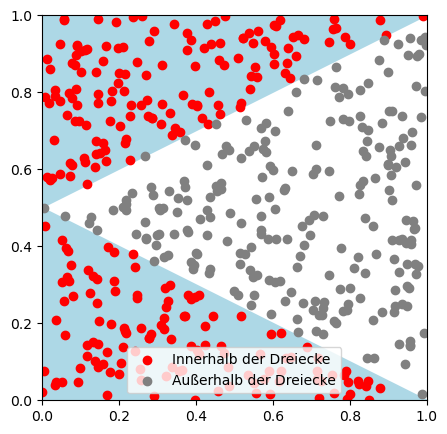

In [35]:
import random
import matplotlib.pyplot as plt

# Anzahl der zufälligen Punkte
N = 500

# Initialisiere Zähler für Punkte im Dreieck
punkte_im_dreieck = 0

# Listen zum Speichern der Koordinaten von Punkten innerhalb und außerhalb des Dreiecks
punkte_im_dreieck_liste = []
punkte_auserhalb_des_dreiecks = []

# Definiere die Koordinaten der Eckpunkte des Quadrats
quadrat_eckpunkte = [(0, 0), (1, 0), (1, 1), (0, 1)]

# Definiere die Koordinaten der Eckpunkte des unteren Dreiecks
unteres_dreieck_eckpunkte = [(0, 0), (1, 0), (0, 0.5)]

# Definiere die Koordinaten der Eckpunkte des oberen Dreiecks
oberes_dreieck_eckpunkte = [(0, 0.5), (1, 1), (0, 1)]

# Erstelle ein Diagramm zur Visualisierung der Punkte
plt.figure(figsize=(5, 5))

# Generiere zufällige Punkte
for _ in range(N):
    x = random.uniform(0, 1)
    y = random.uniform(0, 1)

    # Überprüfe, ob der Punkt sich innerhalb des unteren oder oberen Dreiecks befindet
    def befindet_sich_im_dreieck(eckpunkte):
        A, B, C = eckpunkte
        totalfläche = 0.5 * abs(A[0] * (B[1] - C[1]) + B[0] * (C[1] - A[1]) + C[0] * (A[1] - B[1]))
        fläche1 = 0.5 * abs(x * (B[1] - C[1]) + B[0] * (C[1] - y) + C[0] * (y - B[1]))
        fläche2 = 0.5 * abs(A[0] * (y - C[1]) + x * (C[1] - A[1]) + C[0] * (A[1] - y))
        fläche3 = 0.5 * abs(A[0] * (B[1] - y) + B[0] * (y - A[1]) + x * (A[1] - B[1]))
        return abs(totalfläche - (fläche1 + fläche2 + fläche3)) < 1e-6

    if befindet_sich_im_dreieck(unteres_dreieck_eckpunkte) or befindet_sich_im_dreieck(oberes_dreieck_eckpunkte):
        punkte_im_dreieck += 1
        punkte_im_dreieck_liste.append((x, y))
    else:
        punkte_auserhalb_des_dreiecks.append((x, y))

# Berechne die geschätzte Wahrscheinlichkeit
geschätzte_wahrscheinlichkeit = punkte_im_dreieck / N
print(f"Geschätzte Wahrscheinlichkeit: {geschätzte_wahrscheinlichkeit:.4f}")

# Zeige die Punkte innerhalb und außerhalb der Dreiecke
punkte_im_dreieck_x, punkte_im_dreieck_y = zip(*punkte_im_dreieck_liste)
punkte_auserhalb_des_dreiecks_x, punkte_auserhalb_des_dreiecks_y = zip(*punkte_auserhalb_des_dreiecks)

# Zeichne die Dreiecke
plt.fill(*zip(*unteres_dreieck_eckpunkte), color='lightblue')
plt.fill(*zip(*oberes_dreieck_eckpunkte), color='lightblue')

# Zeichne die Punkte
plt.scatter(punkte_im_dreieck_x, punkte_im_dreieck_y, color='red', label='Innerhalb der Dreiecke')
plt.scatter(punkte_auserhalb_des_dreiecks_x, punkte_auserhalb_des_dreiecks_y, color='gray', label='Außerhalb der Dreiecke')
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend()
plt.show()


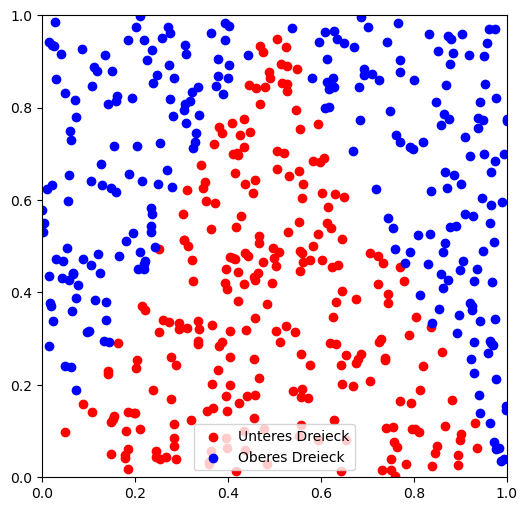

Geschätzte Wahrscheinlichkeit: 0.502


In [37]:
import matplotlib.pyplot as plt
import random

def is_inside_triangle(x, y):
    # Definieren der Eckpunkte des unteren und oberen Dreiecks
    lower_triangle = [(0, 0), (0.5, 1), (1, 0)]
    upper_triangle = [(0, 1), (0.5, 0), (1, 1)]

    # Berechnen des Vorzeichens des Flächeninhalts für jeden Punkt
    def sign(p1, p2, p3):
        return (p1[0] - p3[0]) * (p2[1] - p3[1]) - (p2[0] - p3[0]) * (p1[1] - p3[1])

    d1 = sign((x, y), lower_triangle[0], lower_triangle[1])
    d2 = sign((x, y), lower_triangle[1], lower_triangle[2])
    d3 = sign((x, y), lower_triangle[2], lower_triangle[0])

    d4 = sign((x, y), upper_triangle[0], upper_triangle[1])
    d5 = sign((x, y), upper_triangle[1], upper_triangle[2])
    d6 = sign((x, y), upper_triangle[2], upper_triangle[0])

    # Wenn die Vorzeichen konsistent sind, ist der Punkt im Dreieck
    return (d1 < 0 and d2 < 0 and d3 < 0) or (d4 < 0 and d5 < 0 and d6 < 0)

# Anzahl der zufälligen Punkte
N = 500

# Listen zur Speicherung der Punkte im Inneren des Dreiecks
points_inside_lower = []
points_inside_upper = []

for _ in range(N):
    x = random.uniform(0, 1)
    y = random.uniform(0, 1)

    if is_inside_triangle(x, y):
        points_inside_lower.append((x, y))
    else:
        points_inside_upper.append((x, y))

# Plotten der Punkte
plt.figure(figsize=(6, 6))
plt.scatter(*zip(*points_inside_lower), color='red', label='Unteres Dreieck')
plt.scatter(*zip(*points_inside_upper), color='blue', label='Oberes Dreieck')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend()
plt.show()

# Schätzung der Wahrscheinlichkeit
probability = len(points_inside_lower) / N
print("Geschätzte Wahrscheinlichkeit:", probability)


Wahrscheinlichkeit im oberen Dreieck: 0.504
Wahrscheinlichkeit im unteren Dreieck: 0.496


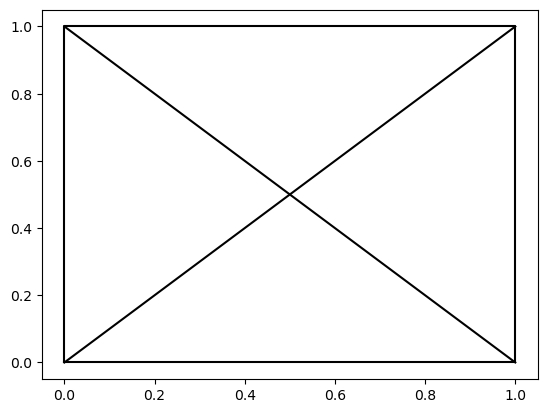

In [38]:
import random
import matplotlib.pyplot as plt

# Anzahl der zufälligen Punkte
N = 500

# Quadratkoordinaten
square_x = [0, 1, 1, 0, 0]
square_y = [0, 0, 1, 1, 0]

# Diagonalen für die beiden Dreiecke
diag1_x = [0, 1]
diag1_y = [0, 1]
diag2_x = [0, 1]
diag2_y = [1, 0]

# Zähler für Punkte in den Dreiecken
points_in_upper_triangle = 0
points_in_lower_triangle = 0

# Generiere zufällige Punkte und zähle sie in den Dreiecken
for _ in range(N):
    x = random.random()  # Zufällige x-Koordinate
    y = random.random()  # Zufällige y-Koordinate

    # Überprüfe, ob der Punkt im oberen Dreieck ist
    if y >= x:
        points_in_upper_triangle += 1

    # Überprüfe, ob der Punkt im unteren Dreieck ist
    if y <= x:
        points_in_lower_triangle += 1

# Berechne die Wahrscheinlichkeiten
probability_upper_triangle = points_in_upper_triangle / N
probability_lower_triangle = points_in_lower_triangle / N

# Zeige das Quadrat und die Diagonalen
plt.plot(square_x, square_y, color='black')
plt.plot(diag1_x, diag1_y, color='black')
plt.plot(diag2_x, diag2_y, color='black')

# Drucke die berechneten Wahrscheinlichkeiten
print("Wahrscheinlichkeit im oberen Dreieck:", probability_upper_triangle)
print("Wahrscheinlichkeit im unteren Dreieck:", probability_lower_triangle)

# Zeige das Diagramm
plt.show()


ValueError: not enough values to unpack (expected 2, got 0)

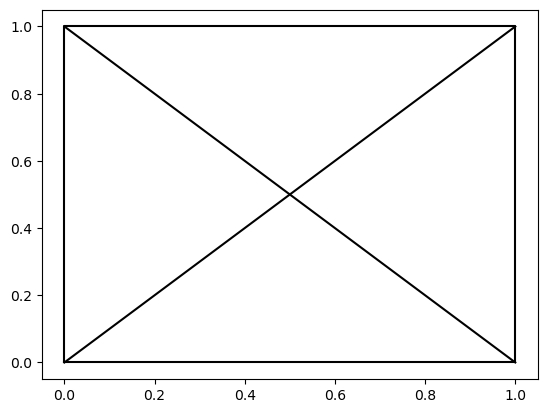

In [42]:
import random
import matplotlib.pyplot as plt

# Number of random points
N = 500

# Square coordinates
square_x = [0, 1, 1, 0, 0]
square_y = [0, 0, 1, 1, 0]

# Diagonals for the two triangles
diag1_x = [0, 1]
diag1_y = [0, 1]
diag2_x = [0, 1]
diag2_y = [1, 0]

# Lists to store points inside and outside the triangles
points_inside_upper_triangle = []
points_inside_lower_triangle = []
points_outside_triangles = []

# Generate random points and classify them
for _ in range(N):
    x = random.random()  # Random x-coordinate
    y = random.random()  # Random y-coordinate

    if y >= x:
        points_inside_upper_triangle.append((x, y))
    elif y <= x:
        points_inside_lower_triangle.append((x, y))
    else:
        points_outside_triangles.append((x, y))

# Plot the square and diagonals
plt.plot(square_x, square_y, color='black')
plt.plot(diag1_x, diag1_y, color='black')
plt.plot(diag2_x, diag2_y, color='black')

# Plot points inside and outside the triangles with different colors
x_inside_upper, y_inside_upper = zip(*points_inside_upper_triangle)
x_inside_lower, y_inside_lower = zip(*points_inside_lower_triangle)
x_outside, y_outside = zip(*points_outside_triangles)

plt.scatter(x_inside_upper, y_inside_upper, color='red', label='Inside Upper Triangle')
plt.scatter(x_inside_lower, y_inside_lower, color='blue', label='Inside Lower Triangle')
plt.scatter(x_outside, y_outside, color='green', label='Outside Triangles')

# Display the legend
plt.legend()

# Show the plot
plt.show()


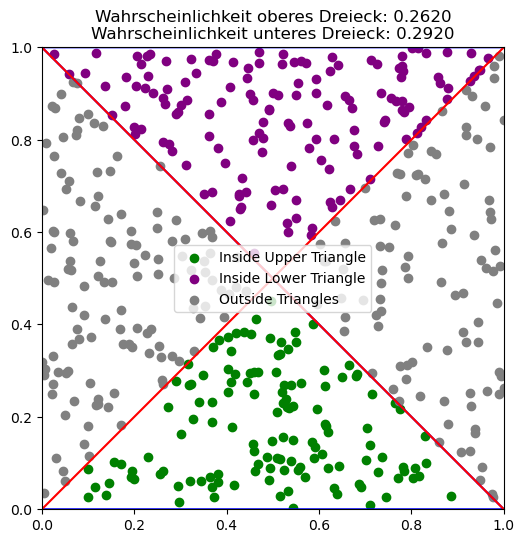

Wahrscheinlichkeit oberes Dreieck: 0.2620
Wahrscheinlichkeit unteres Dreieck: 0.2920


In [48]:
import random
import matplotlib.pyplot as plt

# Anzahl der zufälligen Punkte
N = 500

# Größe des Quadrats
square_size = 1.0

# Koordinaten der Eckpunkte des Quadrats
square_vertices = [(0, 0), (square_size, 0), (0, square_size), (square_size, square_size)]

# Eckpunkte der Diagonalen, um die Dreiecke zu erstellen
diagonal1 = [(0, 0), (square_size, square_size)]
diagonal2 = [(0, square_size), (square_size, 0)]

# Zähler für Punkte innerhalb der Dreiecke
points_inside_upper_triangle = []
points_inside_lower_triangle = []
points_outside_triangles = []

# Generiere zufällige Punkte und überprüfe, ob sie innerhalb der Dreiecke liegen
for _ in range(N):
    x = random.uniform(0, square_size)
    y = random.uniform(0, square_size)

    if (x - diagonal1[0][0]) * (diagonal1[1][1] - diagonal1[0][1]) - (diagonal1[1][0] - diagonal1[0][0]) * (y - diagonal1[0][1]) >= 0 and (x - diagonal2[0][0]) * (diagonal2[1][1] - diagonal2[0][1]) - (diagonal2[1][0] - diagonal2[0][0]) * (y - diagonal2[0][1]) >= 0:
        points_inside_upper_triangle.append((x, y))
    elif (x - diagonal1[0][0]) * (diagonal1[1][1] - diagonal1[0][1]) - (diagonal1[1][0] - diagonal1[0][0]) * (y - diagonal1[0][1]) <= 0 and (x - diagonal2[0][0]) * (diagonal2[1][1] - diagonal2[0][1]) - (diagonal2[1][0] - diagonal2[0][0]) * (y - diagonal2[0][1]) <= 0:
        points_inside_lower_triangle.append((x, y))
    else:
        points_outside_triangles.append((x, y))

# Berechne die Wahrscheinlichkeiten
probability_upper_triangle = len(points_inside_upper_triangle) / N
probability_lower_triangle = len(points_inside_lower_triangle) / N

# Zeige das Quadrat, die Dreiecke und die Punkte in einem Diagramm
plt.figure(figsize=(6, 6))
plt.plot(*zip(*square_vertices), color='blue')
plt.plot(*zip(*diagonal1), color='red')
plt.plot(*zip(*diagonal2), color='red')
plt.fill(*zip(*diagonal1), color='red', alpha=0.3)
plt.fill(*zip(*diagonal2), color='red', alpha=0.3)

x_inside_upper, y_inside_upper = zip(*points_inside_upper_triangle)
x_inside_lower, y_inside_lower = zip(*points_inside_lower_triangle)
x_outside, y_outside = zip(*points_outside_triangles)

plt.scatter(x_inside_upper, y_inside_upper, color='green', label='Inside Upper Triangle')
plt.scatter(x_inside_lower, y_inside_lower, color='purple', label='Inside Lower Triangle')
plt.scatter(x_outside, y_outside, color='gray', label='Outside Triangles')
plt.legend()

plt.title(f'Wahrscheinlichkeit oberes Dreieck: {probability_upper_triangle:.4f}\nWahrscheinlichkeit unteres Dreieck: {probability_lower_triangle:.4f}')
plt.xlim(0, square_size)
plt.ylim(0, square_size)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

# Gib die Wahrscheinlichkeiten aus
print(f'Wahrscheinlichkeit oberes Dreieck: {probability_upper_triangle:.4f}')
print(f'Wahrscheinlichkeit unteres Dreieck: {probability_lower_triangle:.4f}')


# Exercise 3

Im Inneren eines Quadrates mit Seitenlange 1 wahlt man zufallig einen Punkt A. Man verbindet A mit den Spitzen des Quadrates und man erhalt vier Dreiecke mit gemeinsamer Spitze in A. Anhand von Simulationen beantworte man folgende Fragen:
 - (1) Welches ist die Wahrscheinlichkeit, dass genau ein Winkel in A stumpf ist?
 - (2) Welches ist die Wahrscheinlichkeit, dass genau zwei Winkel in A stumpf sind?
Man zeichne auf demselben Bild die zufalligen Punkte (entsprechend den Fa ̈llen (1), (2)) mit verschiedenen Farben.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Probability that exactly one angle in A is obtuse: 0.0
Probability that exactly two angles in A are obtuse: 0.0


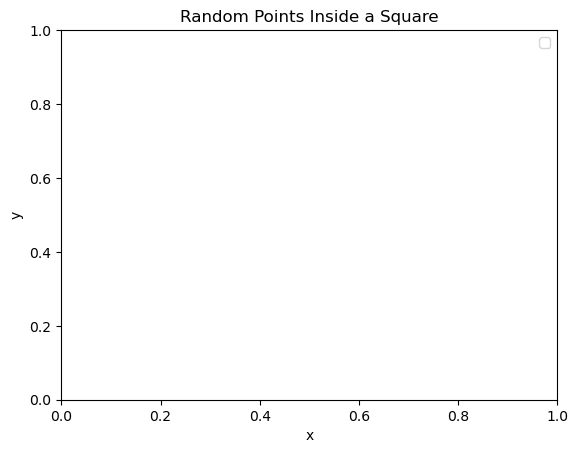

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Number of simulations
N = 10000

# Function to check if an angle is obtuse
def is_obtuse(x, y):
    return x > 0.5 or y > 0.5

# Initialize counters
count_one_obtuse = 0
count_two_obtuse = 0

# Lists to store points for each case
points_one_obtuse = []
points_two_obtuse = []

# Run simulations
for _ in range(N):
    # Generate a random point inside the square
    x, y = np.random.rand(2)
    
    # Check the angles
    angles = [is_obtuse(x, y), is_obtuse(1-x, y), is_obtuse(x, 1-y), is_obtuse(1-x, 1-y)]
    num_obtuse = sum(angles)
    
    # Update counters and lists
    if num_obtuse == 1:
        count_one_obtuse += 1
        points_one_obtuse.append((x, y))
    elif num_obtuse == 2:
        count_two_obtuse += 1
        points_two_obtuse.append((x, y))

# Calculate probabilities
prob_one_obtuse = count_one_obtuse / N
prob_two_obtuse = count_two_obtuse / N

print(f"Probability that exactly one angle in A is obtuse: {prob_one_obtuse}")
print(f"Probability that exactly two angles in A are obtuse: {prob_two_obtuse}")

# Draw the points
if points_one_obtuse:
    points_one_obtuse = np.array(points_one_obtuse)
    plt.scatter(points_one_obtuse[:, 0], points_one_obtuse[:, 1], color='red', label='One obtuse angle')
if points_two_obtuse:
    points_two_obtuse = np.array(points_two_obtuse)
    plt.scatter(points_two_obtuse[:, 0], points_two_obtuse[:, 1], color='blue', label='Two obtuse angles')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Random Points Inside a Square')
plt.legend()
plt.show()

# Exercise 6

 Man schreibe ein Programm (in Python), in welchem ein Bild mit N = 500 roten zufa ̈lligen Punkten generiert wird −→ wie im unteren Bild. 
 Man schätze die Wahrscheinlichkeit, dass ein zufallig gewa ̈hlter Punkt aus dem Quadrat sich im Inneren des unteren oder oberen Dreieckes befindet (wie im Bild).

Probability that a random point is inside the triangles: 0.262


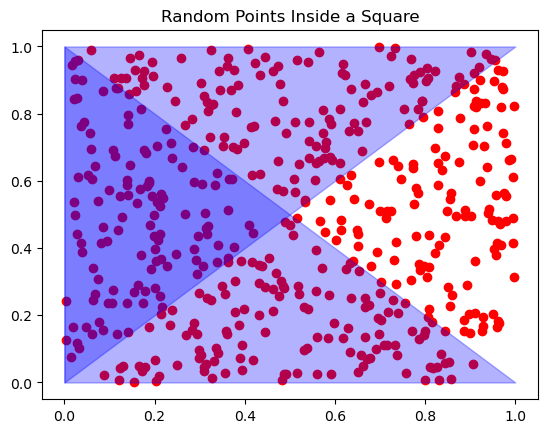

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Number of points
N = 500

# Function to check if a point is inside the triangles
def is_inside_triangles(x, y):
    return y < x and y < (1 - x)

# Generate random points
points = np.random.rand(N, 2)

# Check which points are inside the triangles
inside_triangles = np.apply_along_axis(lambda p: is_inside_triangles(p[0], p[1]), 1, points)

# Calculate the probability
prob_inside_triangles = np.mean(inside_triangles)

print(f"Probability that a random point is inside the triangles: {prob_inside_triangles}")

# Plot the points
plt.scatter(points[:, 0], points[:, 1], color='red')
plt.fill_between([0, 1], [0, 0], [1, 0], color='blue', alpha=0.3)
plt.fill_between([0, 1], [1, 1], [0, 1], color='blue', alpha=0.3)
plt.title('Random Points Inside a Square')
plt.show()

# Exercise 2

Man mochte die Wahrscheinlichkeit schatzen, dass ein zufallig gew ̈ahlter Punkt im Quadrat [0,1] × [0,1] sich auch in dem eingeschriebenen Kreis befindet (siehe Bild).

The probability of a point to bi inside the circle : 0.2
pi is approx : 0.8


Text(0.5, -0.1, '\n\nPoints inside the circle: 80\n')

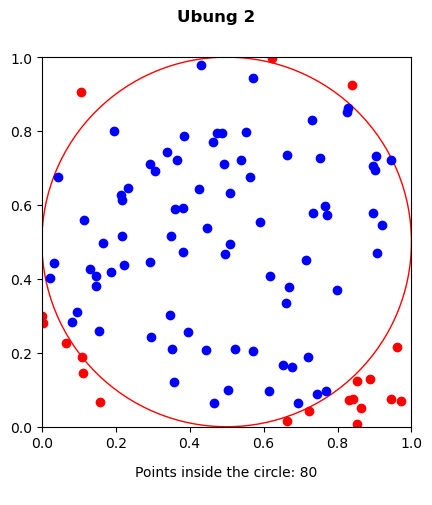

In [7]:
n = 100
fig = figure()
axis("square")
axis((0, 1, 0, 1))
x = np.random.random(n)
y = np.random.random(n)

inside_circle = 0
outside_circle = 0
k = 0
for i in range(len(x)):
    distance = np.linalg.norm([x[i] - 0.5, y[i] - 0.5])  # Euclidean distance
    if distance <= 0.5:
        plot(x[i], y[i], "bo")
        inside_circle += 1
    else:
        plot(x[i], y[i], "ro")
        outside_circle += 1
        k += 1

circle = Circle((0.5, 0.5), 0.5, fill=False, color='r')
ax = fig.gca()
ax.add_patch(circle)


# (2b) Welches ist die Wahrscheinlichkeit, dass der Punkt im Kreisinneren ist?
# [Der theoretische Wert ist π/4, bzw. die Approximation ist k/N]
probability = k / n
print(f"The probability of a point to bi inside the circle : {probability}")

# (2c) Anhand von (2a) und (2b) gebe man verschiedene Approximationen von π an.
# [Hinweis: π ≈ 4 * k/N]
print(f"pi is approx : {4 * probability}")


fig.suptitle("Ubung 2 ", fontweight="bold")
text(0.5, -0.1, f"\n\nPoints inside the circle: {inside_circle}\n",
            horizontalalignment='center', verticalalignment='center')

# Exercise 3

Im Inneren eines Quadrates mit Seitenlange 1 wahlt man zufallig einen Punkt A. Man verbindet A mit den
Spitzen des Quadrates und man erhalt vier Dreiecke mit gemeinsamer Spitze in A. Anhand von Simulationen
beantworte man folgende Fragen:
- (1) Welches ist die Wahrscheinlichkeit, dass genau ein Winkel in A stumpf ist?
- (2) Welches ist die Wahrscheinlichkeit, dass genau zwei Winkel in A stumpf sind?
Man zeichne auf demselben Bild die zuf ̈alligen Punkte (entsprechend den Fallen (1), (2)) mit verschiedenen
Farben.

Die Wahrscheinlichkeit, dass genau ein Winkel in A stumpf ist: 0.36
Die Wahrscheinlichkeit, dass genau zwei Winkeln in A stumpf sind: 0.50


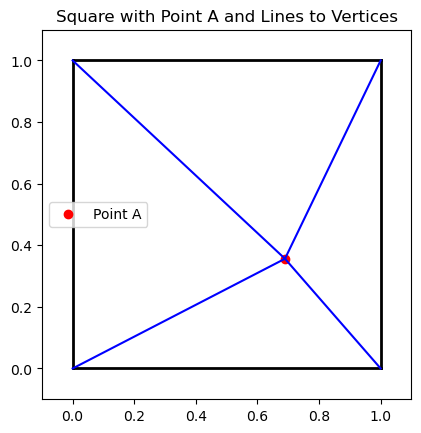

In [9]:
def is_obtuse_triangle(x, y):
    sides = [
        np.linalg.norm(x - y),
        np.linalg.norm(x),
        np.linalg.norm(y)
    ]
    sides.sort()
    return sides[0]**2 + sides[1]**2 < sides[2]**2

num_simulations = 10000
count_obtuse_triangles1 = 0
count_obtuse_triangles2 = 0

for _ in range(num_simulations):
    A = np.random.rand(2)
    square_vertices = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

    obtuse_count = 0
    for vertex in square_vertices:
        if is_obtuse_triangle(A, vertex):
            obtuse_count += 1
    if obtuse_count == 1:
        count_obtuse_triangles1 += 1
    if obtuse_count == 2:
        count_obtuse_triangles2 += 1

probability1 = count_obtuse_triangles1 / num_simulations
probability2 = count_obtuse_triangles2 / num_simulations
print(f"Die Wahrscheinlichkeit, dass genau ein Winkel in A stumpf ist: {probability1:.2f}")
print(f"Die Wahrscheinlichkeit, dass genau zwei Winkeln in A stumpf sind: {probability2:.2f}")


# plotting
fig, ax = plt.subplots()

square_lines = [[square_vertices[0], square_vertices[1]],
                [square_vertices[1], square_vertices[3]],
                [square_vertices[3], square_vertices[2]],
                [square_vertices[2], square_vertices[0]]]

for line in square_lines:
    ax.plot([line[0][0], line[1][0]], [line[0][1], line[1][1]], 'k-', linewidth=2)

ax.plot(A[0], A[1], 'ro', label='Point A')

for vertex in square_vertices:
    if not np.array_equal(A, vertex):  # exclude diagonal lines
        ax.plot([A[0], vertex[0]], [A[1], vertex[1]], 'b-')

ax.set_xlim([-0.1, 1.1])
ax.set_ylim([-0.1, 1.1])
ax.set_aspect('equal', adjustable='box')
plt.title('Square with Point A and Lines to Vertices')
plt.legend()
plt.show()

# Exercise 4

Man schreibe ein Programm (in Python), in welchem ein Bild mit N = 500 roten zuf ̈alligen Punkten generiert wird −→wie im unteren Bild. Man sch ̈atze die Wahrscheinlichkeit, dass ein zufallig gewahlter Punkt aus dem Quadrat sich im Inneren des unteren oder oberen Dreieckes befindet (wie im Bild).

In [14]:
def ex4(num_simulations):
    # Man schreibe ein Programm (in Python), in welchem ein Bild mit N = 500 roten zufalligen Punkten generiert
    # wird −→ wie im unteren Bild. Man schatze die Wahrscheinlichkeit, dass ein zufallig gewahlter Punkt aus dem
    # Quadrat sich im Inneren des unteren oder oberen Dreieckes befindet (wie im Bild).
    points = random.rand(num_simulations, 2)

    # Define the vertices of the upper and lower triangles
    upper_triangle = array([[0.2, 0.8], [0.8, 0.8], [0.5, 0.5]])
    lower_triangle = array([[0.2, 0.2], [0.8, 0.2], [0.5, 0.5]])

    # Check if each point is inside the upper or lower triangle
    inside_upper_triangle = array([is_inside_triangle(p, *upper_triangle) for p in points])
    inside_lower_triangle = array([is_inside_triangle(p, *lower_triangle) for p in points])

    # Combine the conditions to get points inside either triangle
    inside_either_triangle = inside_upper_triangle | inside_lower_triangle

    # Calculate the probability of a randomly chosen point being inside either triangle
    probability_inside_either_triangle = sum(inside_either_triangle) / N

    # Plot the points with different colors for inside and outside the triangles
    plot_points(points, inside_either_triangle)

    # Display the calculated probability
    print("Estimated probability of a point being inside either triangle:", probability_inside_either_triangle)


def plot_points(points, inside_triangle):
    figure()
    scatter(points[:, 0], points[:, 1], c=inside_triangle, cmap='viridis', marker='.')
    title('Points Inside Either Triangle')
    xlabel('X-axis')
    ylabel('Y-axis')
    colorbar(label='Inside Triangle')
    show()


def is_inside_triangle(p, a, b, c):
    # Check if point p is inside the triangle defined by vertices a, b, c
    def sign(p1, p2, p3):
        return (p1[0] - p3[0]) * (p2[1] - p3[1]) - (p2[0] - p3[0]) * (p1[1] - p3[1])

    d1 = sign(p, a, b)
    d2 = sign(p, b, c)
    d3 = sign(p, c, a)

    has_neg = (d1 < 0) or (d2 < 0) or (d3 < 0)
    has_pos = (d1 > 0) or (d2 > 0) or (d3 > 0)

    return not (has_neg and has_pos)

ex4(500)

AttributeError: module 'random' has no attribute 'rand'

Probability of a point in the upper triangle: 0.28
Probability of a point in the lower triangle: 0.23


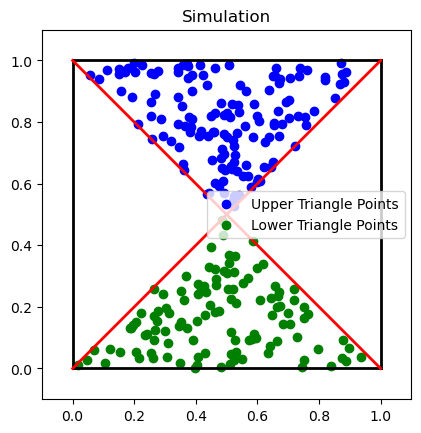

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def is_point_in_upper_triangle(P):
    return P[1] > P[0] and P[1] > 1 - P[0]

def is_point_in_lower_triangle(P):
    return P[1] < P[0] and P[1] < 1 - P[0]

num_points = 500
upper_triangle_count = 0
lower_triangle_count = 0

upper_triangle_points = []
lower_triangle_points = []

for _ in range(num_points):
    P = np.random.rand(2)

    if is_point_in_upper_triangle(P):
        upper_triangle_points.append(P)
        upper_triangle_count += 1
    elif is_point_in_lower_triangle(P):
        lower_triangle_points.append(P)
        lower_triangle_count += 1

probability_upper_triangle = upper_triangle_count / num_points
probability_lower_triangle = lower_triangle_count / num_points

print(f"Probability of a point in the upper triangle: {probability_upper_triangle:.2f}")
print(f"Probability of a point in the lower triangle: {probability_lower_triangle:.2f}")

fig, ax = plt.subplots()

square_vertices = np.array([[0, 0], [0, 1], [1, 1], [1, 0]])
square_lines = [[square_vertices[0], square_vertices[1]],
                [square_vertices[1], square_vertices[2]],
                [square_vertices[2], square_vertices[3]],
                [square_vertices[3], square_vertices[0]]]

for line in square_lines:
    ax.plot([line[0][0], line[1][0]], [line[0][1], line[1][1]], 'k-', linewidth=2)

ax.plot([square_vertices[0][0], square_vertices[2][0]], [square_vertices[0][1], square_vertices[2][1]], 'r-', linewidth=2)
ax.plot([square_vertices[1][0], square_vertices[3][0]], [square_vertices[1][1], square_vertices[3][1]], 'r-', linewidth=2)

if upper_triangle_count > 0:
    upper_triangle_points = np.array(upper_triangle_points)
    ax.scatter(upper_triangle_points[:, 0], upper_triangle_points[:, 1], c='blue', label='Upper Triangle Points')

if lower_triangle_count > 0:
    lower_triangle_points = np.array(lower_triangle_points)
    ax.scatter(lower_triangle_points[:, 0], lower_triangle_points[:, 1], c='green', label='Lower Triangle Points')

ax.set_xlim([-0.1, 1.1])
ax.set_ylim([-0.1, 1.1])
ax.set_aspect('equal', adjustable='box')
plt.title('Simulation')
plt.legend()
plt.show()